In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action = 'ignore', category = UserWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)
warnings.filterwarnings(action='ignore', category = RuntimeWarning)
warnings.filterwarnings(action='ignore', category = SettingWithCopyWarning)

/kaggle/input/playground-series-s5e4/sample_submission.csv
/kaggle/input/playground-series-s5e4/train.csv
/kaggle/input/playground-series-s5e4/test.csv


In [2]:
#load dataset

train_df = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')

In [3]:
train_df.shape

(750000, 12)

In [4]:
test_df.shape

(250000, 11)

In [5]:
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [6]:
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [7]:
#concatenate train and test data to make it complete data
complete_df = pd.concat((train_df, test_df), axis=0)
complete_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [8]:
complete_df.shape

(1000000, 12)

In [9]:
complete_df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [10]:
#drop target varaibel(column)
complete_df = complete_df.drop(labels='Listening_Time_minutes', axis = 1)


In [11]:
complete_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral


# Exploratory Data Analysis

## Basic stats


In [12]:
print("INfo of Train Data")
train_df.info()

INfo of Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memo

In [13]:
print("INfo of Test Data")
test_df.info()

INfo of Test Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


In [14]:
#check for null values

train_df.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [15]:
test_df.isna().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [16]:
#percentage of missing/nulll values
train_null_percentage = train_df.isna().sum()/len(train_df)*100
test_null_percentage = test_df.isna().sum()/len(test_df)*100

print("training data missing Percentage : \n", train_null_percentage)
print("\n----------------------------------\n")
print("testing data missing Percentage : \n", test_null_percentage)

training data missing Percentage : 
 id                              0.000000
Podcast_Name                    0.000000
Episode_Title                   0.000000
Episode_Length_minutes         11.612400
Genre                           0.000000
Host_Popularity_percentage      0.000000
Publication_Day                 0.000000
Publication_Time                0.000000
Guest_Popularity_percentage    19.470667
Number_of_Ads                   0.000133
Episode_Sentiment               0.000000
Listening_Time_minutes          0.000000
dtype: float64

----------------------------------

testing data missing Percentage : 
 id                              0.0000
Podcast_Name                    0.0000
Episode_Title                   0.0000
Episode_Length_minutes         11.4944
Genre                           0.0000
Host_Popularity_percentage      0.0000
Publication_Day                 0.0000
Publication_Time                0.0000
Guest_Popularity_percentage    19.5328
Number_of_Ads                   

In [17]:
pd.DataFrame({
    'train_null_perc': train_null_percentage,
    'test_null_perc': test_null_percentage
})

,train_null_perc,test_null_perc
Episode_Length_minutes,11.612400,11.4944
Episode_Sentiment,0.000000,0.0000
Episode_Title,0.000000,0.0000
Genre,0.000000,0.0000
Guest_Popularity_percentage,19.470667,19.5328
Host_Popularity_percentage,0.000000,0.0000
Listening_Time_minutes,0.000000,NaN
Number_of_Ads,0.000133,0.0000
Podcast_Name,0.000000,0.0000
Publication_Day,0.000000,0.0000


In [18]:
# maximum values of Episode Lenght, Number of ads, host popularity, listening Time

train_df['Episode_Length_minutes'].max()

325.24

In [19]:
train_df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [20]:
train_df['Listening_Time_minutes'].describe()

count    750000.000000
mean         45.437406
std          27.138306
min           0.000000
25%          23.178350
50%          43.379460
75%          64.811580
max         119.970000
Name: Listening_Time_minutes, dtype: float64

## 1. Univariate Analysis

In [21]:
complete_df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment'],
      dtype='object')

In [22]:
complete_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral


In [23]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   id                           1000000 non-null  int64  
 1   Podcast_Name                 1000000 non-null  object 
 2   Episode_Title                1000000 non-null  object 
 3   Episode_Length_minutes       884171 non-null   float64
 4   Genre                        1000000 non-null  object 
 5   Host_Popularity_percentage   1000000 non-null  float64
 6   Publication_Day              1000000 non-null  object 
 7   Publication_Time             1000000 non-null  object 
 8   Guest_Popularity_percentage  805138 non-null   float64
 9   Number_of_Ads                999999 non-null   float64
 10  Episode_Sentiment            1000000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 91.6+ MB


### 1.1 Top Podcast name distribution

In [24]:
podcast_name = complete_df.groupby(by='Podcast_Name')['Genre'].count().sort_values(ascending=False)
podcast_name

Podcast_Name
Tech Talks             30400
Sports Weekly          26686
Funny Folks            26256
Fitness First          26031
Tech Trends            25995
Business Insights      25928
Style Guide            25833
Game Day               25617
Melody Mix             25246
Criminal Minds         23715
Finance Focus          23487
Detective Diaries      23251
Crime Chronicles       23241
Fashion Forward        23067
Athlete's Arena        22989
Tune Time              22987
Business Briefs        22697
Lifestyle Lounge       22349
True Crime Stories     21790
Humor Hub              21620
Sports Central         21615
Digital Digest         21417
Mystery Matters        21270
Comedy Corner          21185
Joke Junction          20113
Wellness Wave          19957
Sport Spot             19622
Home & Living          19619
Gadget Geek            19619
Laugh Line             19579
Life Lessons           19287
Sound Waves            18617
World Watch            18599
Global News            18274
M

In [25]:
podcast_dict = {'Podcast Name': podcast_name.index,
'Count': podcast_name.values}

podcast_df = pd.DataFrame(podcast_dict)
podcast_df

,Podcast Name,Count
0,Tech Talks,30400
1,Sports Weekly,26686
2,Funny Folks,26256
3,Fitness First,26031
4,Tech Trends,25995
5,Business Insights,25928
6,Style Guide,25833
7,Game Day,25617
8,Melody Mix,25246
9,Criminal Minds,23715


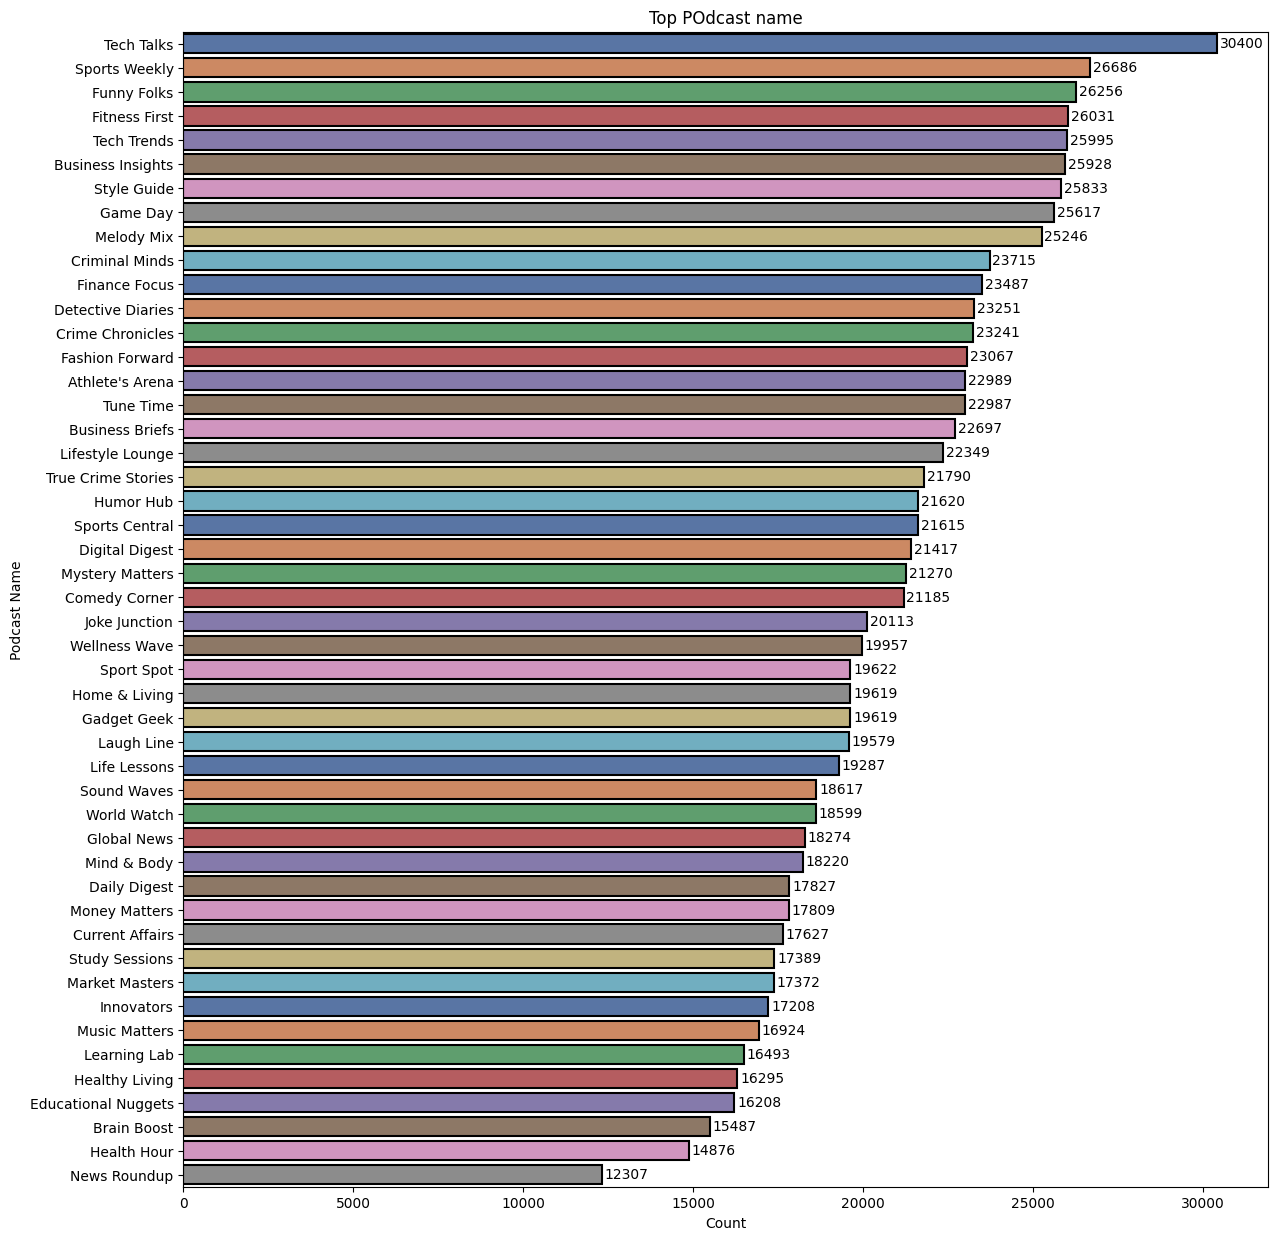

In [26]:
#plot the podcast name with barplot
plt.figure(figsize = (14,15))
ax = sns.barplot(y = podcast_df['Podcast Name'],
            x = podcast_df['Count'],
            edgecolor = 'black',
                 palette = 'deep',
            linewidth=1.5,
            orient='h')
for bar in ax.containers:
    plt.bar_label(container = bar, fmt='%d', 
                  label_type='edge', padding=2, fontsize=10, color ='black')
plt.title('Top POdcast name')
plt.show()

#### Observation
1. Tech talks are the popular podcasts with 30400 podcast episodes

Text(0.5, 1.0, 'WORDCLOUD for PODCAST NAME')

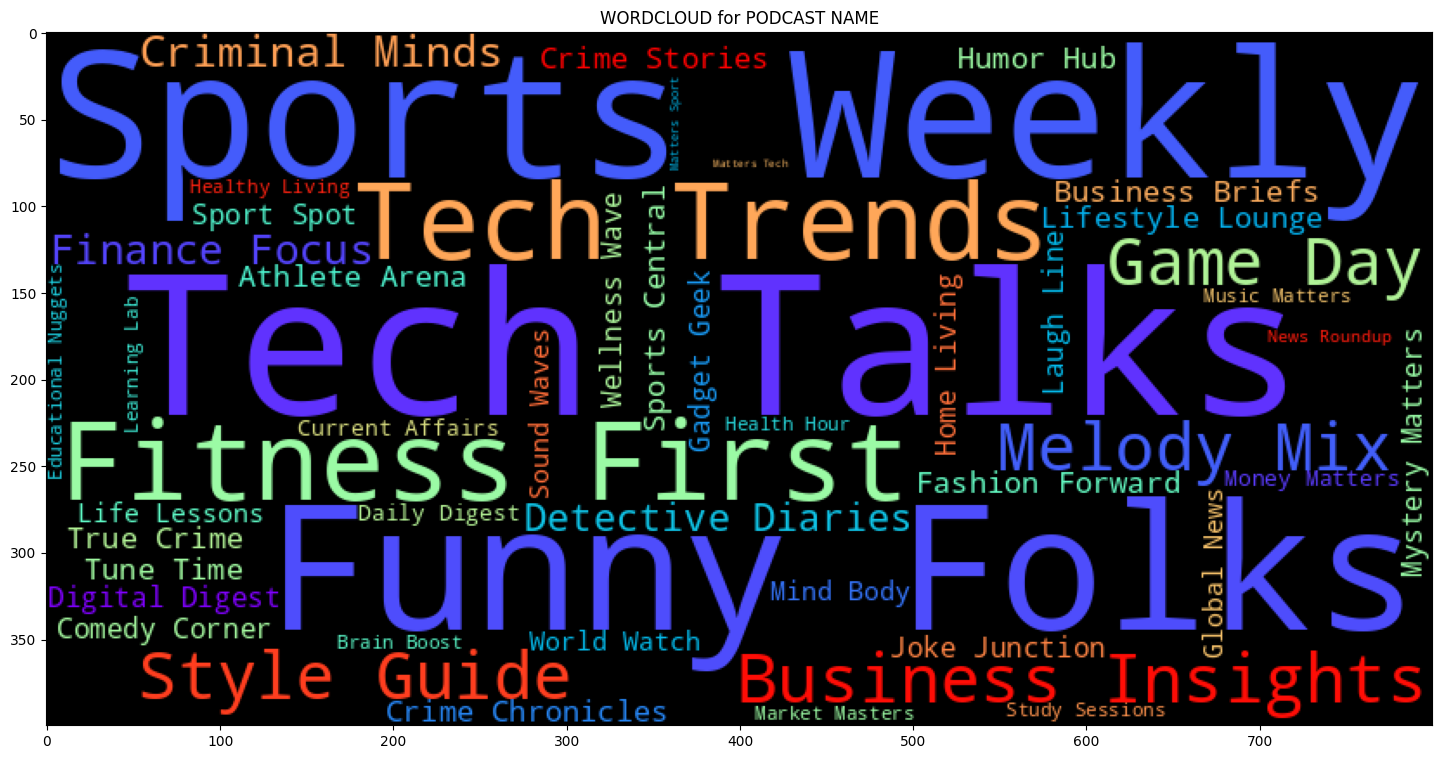

In [27]:
plt.figure(figsize = (18, 9))

wordCloud = WordCloud(width=800,
         height=400,
         max_words = 50,
         random_state=2025,
         colormap='rainbow')

wordCloud = wordCloud.generate(text = ' '.join(complete_df['Podcast_Name']))
plt.imshow(wordCloud)
plt.title("WORDCLOUD for PODCAST NAME")

### 1.2 TOP 10 PODCAST with average EPISODE LENGTH

In [28]:
ep_duration = complete_df.groupby(by='Podcast_Name')['Episode_Length_minutes'].mean().sort_values(ascending=False).reset_index(drop=False).head(10)
ep_duration

,Podcast_Name,Episode_Length_minutes
0,Market Masters,5134.033019
1,Melody Mix,68.173763
2,Sports Weekly,66.997299
3,Money Matters,66.766069
4,Business Briefs,66.689123
5,Home & Living,66.454780
6,Mind & Body,66.302136
7,Tune Time,66.088958
8,Crime Chronicles,66.047268
9,Detective Diaries,65.919528


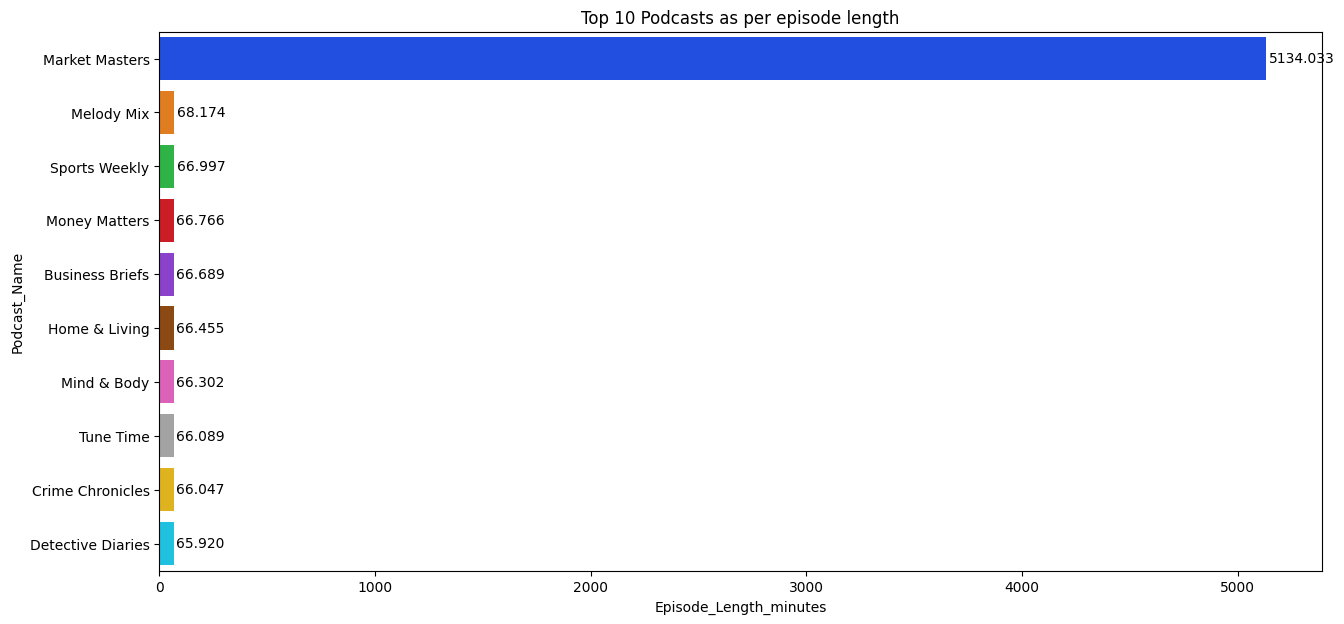

In [29]:
plt.figure(figsize = (15,7))
ax = sns.barplot(data = ep_duration, x = 'Episode_Length_minutes', y='Podcast_Name',
           palette = 'bright')

for bar in ax.containers:
    plt.bar_label(container = bar, fmt='%.3f', 
                  label_type='edge', padding=2, fontsize=10, color ='black')
plt.title('Top 10 Podcasts as per episode length')
plt.show()

#### Observation
1. the average lenght of podcasts is 1 hour
2.  we have one suspecious pocast with 100 hour+  per ep lenght

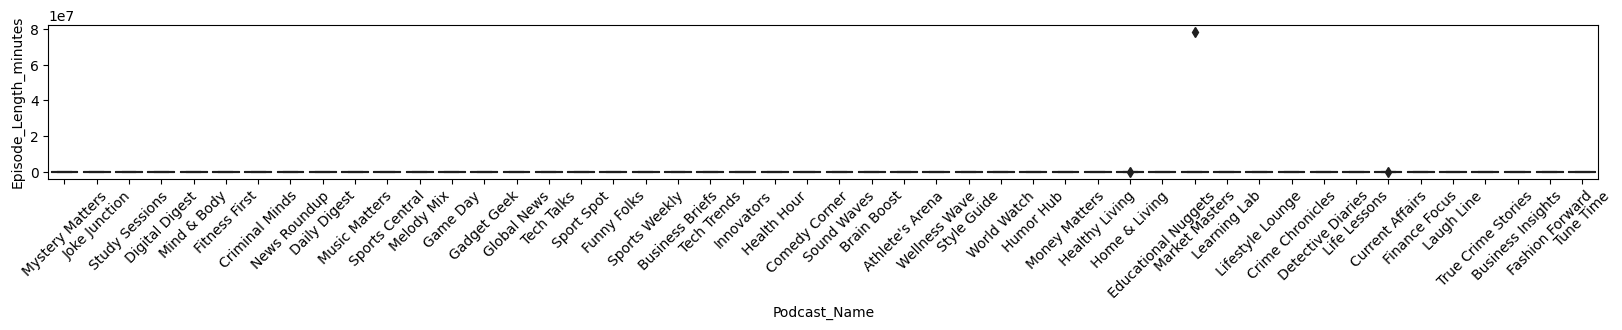

In [30]:
#box plot

plt.figure(figsize=(20,2))
sns.boxplot(data = complete_df,
           x = "Podcast_Name",
           y = "Episode_Length_minutes", 
           palette = 'dark')
plt.xticks(rotation=45)
plt.show()

#### Observation
Market Masters having a huge outlier due to which mean is incresing. 

We can remove the outlier in FEATURE ENGINEERING SECTION

### 1.3 TOP 10 Podcast with Logest average listener

In [31]:
listen_duration = train_df.groupby(by='Podcast_Name')['Listening_Time_minutes'].mean().sort_values(ascending=False).reset_index(drop=False).head(10)
listen_duration

,Podcast_Name,Listening_Time_minutes
0,Melody Mix,48.105553
1,Money Matters,47.883883
2,Crime Chronicles,47.678948
3,Business Briefs,47.121103
4,Study Sessions,47.047780
5,Gadget Geek,47.027739
6,Sports Weekly,46.965997
7,Tune Time,46.898123
8,Mind & Body,46.840078
9,Detective Diaries,46.755035


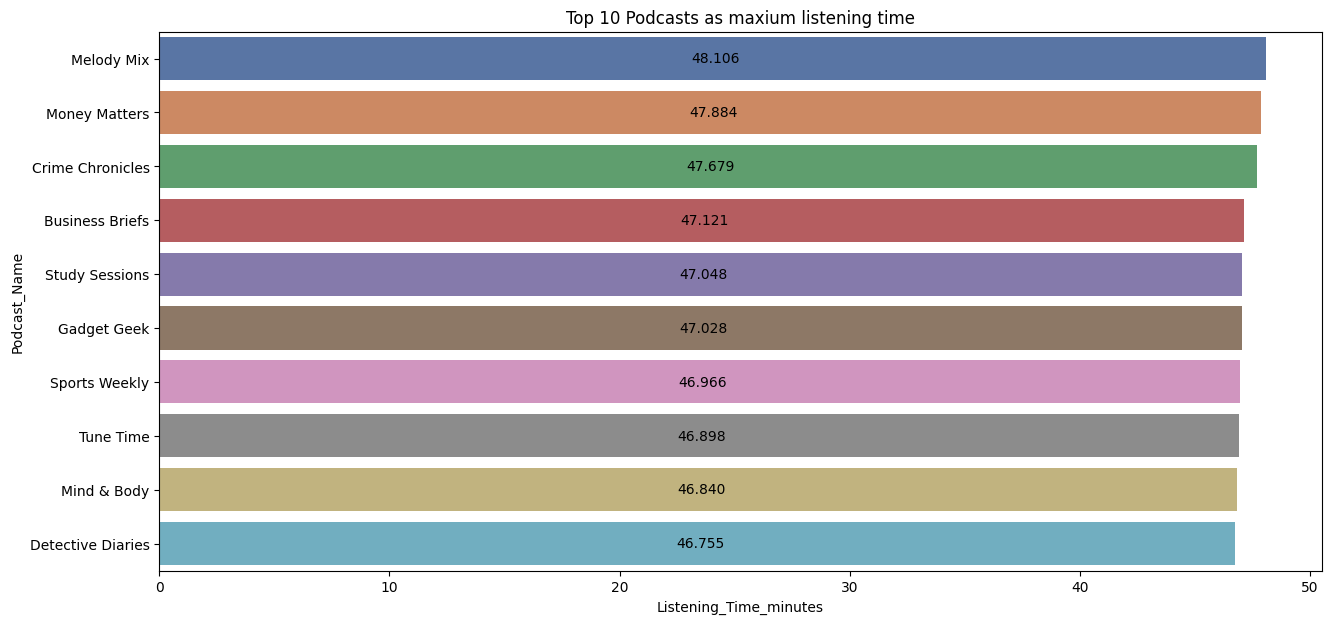

In [32]:
plt.figure(figsize = (15,7))
ax = sns.barplot(data = listen_duration, x = 'Listening_Time_minutes', y='Podcast_Name',
           palette = 'deep')

for bar in ax.containers:
    plt.bar_label(container = bar, fmt='%.3f', 
                  label_type='center', padding=2, fontsize=10, color ='black')
plt.title('Top 10 Podcasts as maxium listening time')
plt.show()